In [1]:
import pytesseract
import cv2
from PIL import Image

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=839x299 at 0x7FDCFE12C220>
(839, 299)


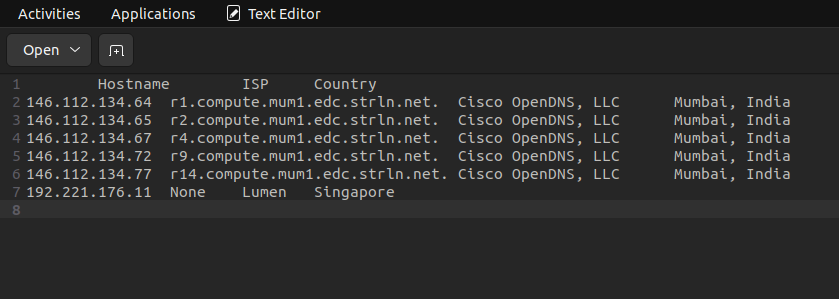

In [8]:
# Opening the file 
im=Image.open("./file.png")

print(im)
# <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=839x299 at 0x7FBB8BACFEE0>
print(im.size)
im

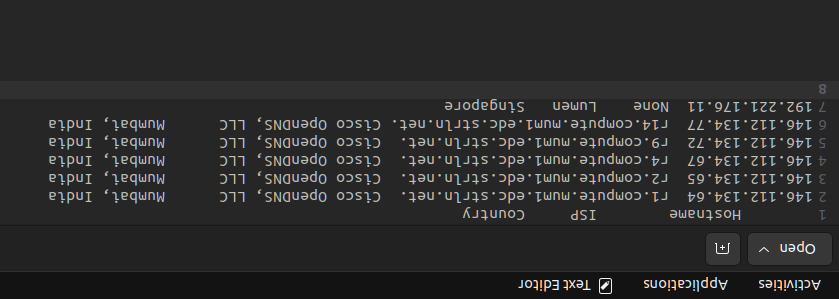

In [11]:
# now we are going to see some of the feature which we can use in the pillow 
# rotate the image  we have to pass rotating angle inside the braces
im.rotate(180)

In [33]:
# yolo coordinates to coco 
def yolo_to_coco(x_center, y_center, w, h,  image_w, image_h):
    w = w * image_w
    h = h * image_h
    x1 = ((2 * x_center * image_w) - w)/2
    y1 = ((2 * y_center * image_h) - h)/2
    return (x1, y1, w, h)

In [41]:
def yoloToPascalVoc(x_center, y_center, w, h,  image_w, image_h):
    w = w * image_w
    h = h * image_h
    x1 = ((2 * x_center * image_w) - w)/2
    y1 = ((2 * y_center * image_h) - h)/2
    x2 = x1 + w
    y2 = y1 + h
    return [x1, y1, x2, y2]

In [42]:
# yolo_to_coco(0.490833 ,0.56,0.641667,0.615,600,400)
yoloToPascalVoc(0.490833 ,0.56,0.641667,0.615,600,400)

[101.99969999999999, 101.00000000000003, 486.9999, 347.0]

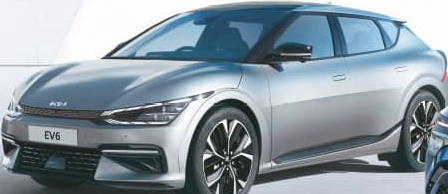

In [ ]:
# crop the image with pillow 
image=Image.open("car-14.png")
# image.width
l="3 0.714796 0.558474 0.447959 0.221011"
# l="3 0.286735 0.536174 0.457143 0.19227"
m=l.split(" ")
m=m[1:]
image.crop(yoloToPascalVoc(float(m[0]),float(m[1]),float(m[2]),float(m[3]),image.width,image.height))
